## Importing Libraries

In [3]:
import tensorflow as tf
from tensorflow import keras
print("Tensorflow Version : ", tf.__version__)
print("Keras Version : ", keras.__version__)

Tensorflow Version :  2.8.2
Keras Version :  2.8.0


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Load Datasets

In [5]:
mnist = keras.datasets.mnist

In [6]:
type(mnist)

module

In [37]:
trainset, testset = mnist.load_data()
X_train, y_train = trainset
X_test , y_test = testset

## Exploratory Data Analysis

In [42]:
print("X_train_shape {0}".format(X_train.shape))
print("y_train shape {0}".format(y_train.shape))
print("X_test shape {0}".format(X_test.shape))
print("y_test shape {0}".format(y_test.shape))

X_train_shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [56]:
X_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

### Analyse Training Dataset

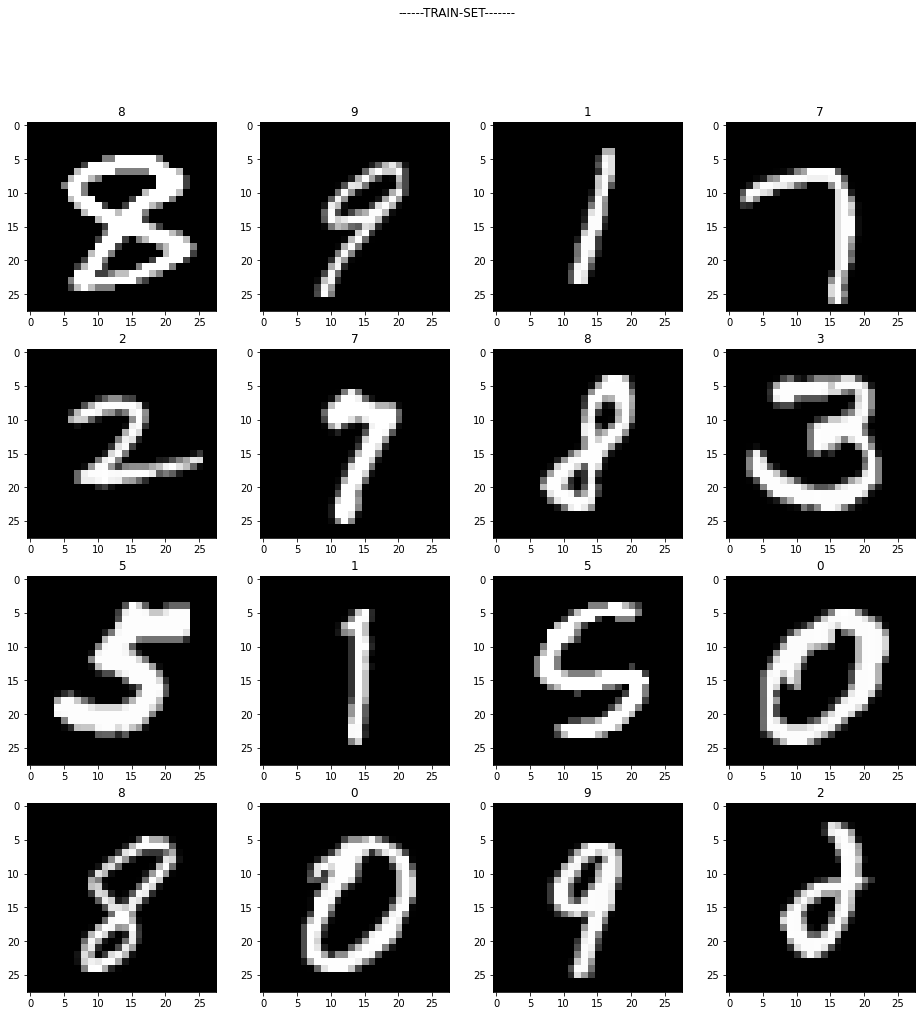

In [61]:
import random
%matplotlib inline

rows,cols = 4,4
fig, axes = plt.subplots(rows,cols,figsize = (16,16))

fig.suptitle("------TRAIN-SET-------")
for i in range(rows):
    for j in range(cols):
        ax = axes[i][j]
        ind = random.randint(0,X_train.shape[0])
        ax.imshow(X_train[ind],cmap='gray')
        ax.set_title(y_train[ind])

In [47]:
X_train[0].shape

(28, 28)

### Analyse Test Dataset

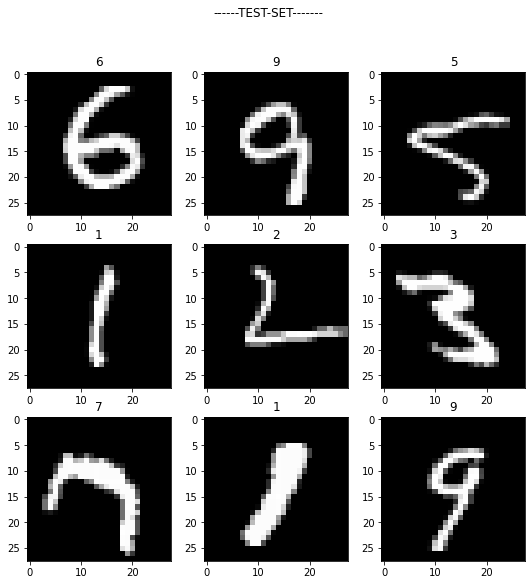

In [62]:
rows,cols = 3,3
fig, axes = plt.subplots(rows,cols,figsize = (9,9))

fig.suptitle("------TEST-SET-------")
for i in range(rows):
    for j in range(cols):
        ax = axes[i][j]
        ind = random.randint(0,X_test.shape[0])
        ax.imshow(X_test[ind],cmap='gray')
        ax.set_title(y_test[ind])

## Model Creation

### Model 1 
-- 2 Hidden Layers  

-- Adam Optimizer 

-- Early Stopping to Stop Model when Validation Loss stays with 1% for 5 consecutive epochs.  


In [135]:
def get_model():

    model = keras.models.Sequential([
        keras.layers.Input(shape=(28,28)),
        keras.layers.Flatten(),
        keras.layers.Dense(units=512,activation='relu'),
        keras.layers.Dense(units=256,activation='relu'),
        keras.layers.Dense(units=10,activation='softmax')
    ])

    return model

In [142]:
model = get_model()

In [154]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Model 1 Summary

In [155]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_22 (Dense)            (None, 512)               401920    
                                                                 
 dense_23 (Dense)            (None, 256)               131328    
                                                                 
 dense_24 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


### Model 1 Training

In [163]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
epochs = 100
batch_size = int(X_train.shape[0]/epochs)
validation_split = 0.3

In [164]:
history = model.fit(X_train,y_train,
          batch_size = batch_size ,
          epochs = epochs ,
          callbacks = callback,
          validation_split = validation_split,
          initial_epoch=0)

Epoch 1/100
70/70 [==============================] - 8s 106ms/step - loss: 0.0647 - accuracy: 0.9828 - val_loss: 0.1828 - val_accuracy: 0.9699
Epoch 2/100
70/70 [==============================] - 5s 72ms/step - loss: 0.0342 - accuracy: 0.9899 - val_loss: 0.1719 - val_accuracy: 0.9723
Epoch 3/100
70/70 [==============================] - 5s 78ms/step - loss: 0.0254 - accuracy: 0.9922 - val_loss: 0.1745 - val_accuracy: 0.9732
Epoch 4/100
70/70 [==============================] - 5s 69ms/step - loss: 0.0209 - accuracy: 0.9935 - val_loss: 0.1752 - val_accuracy: 0.9734
Epoch 5/100
70/70 [==============================] - 5s 68ms/step - loss: 0.0182 - accuracy: 0.9943 - val_loss: 0.1759 - val_accuracy: 0.9737
Epoch 6/100
70/70 [==============================] - 4s 51ms/step - loss: 0.0163 - accuracy: 0.9946 - val_loss: 0.1783 - val_accuracy: 0.9738
Epoch 7/100
70/70 [==============================] - 4s 62ms/step - loss: 0.0149 - accuracy: 0.9949 - val_loss: 0.1817 - val_accuracy: 0.9739
Epoch

--- Model 1 Reached about 99.6% training set accuracy and 97.52% test set accuracy

### Model 2
-- 2 Hidden Layers  

-- Adam Optimizer 

-- Early Stopping to Stop Model when Validation Loss stays with 1% for 5 consecutive epochs.  

In [165]:
def get_model_2():

    model = keras.models.Sequential([
        keras.layers.Input(shape=(28,28)),
        keras.layers.Flatten(),
        keras.layers.Dense(units=512,activation='relu'),
        keras.layers.Dense(units=256,activation='relu'),
        keras.layers.Dense(units=128,activation='relu'),
        keras.layers.Dense(units=64,activation='relu'),
        keras.layers.Dense(units=32,activation='relu'),
        keras.layers.Dense(units=10,activation='softmax'),
    ])

    return model

In [166]:
model_2 = get_model_2()

model_2.compile(optimizer='Adamax',
                loss='sparse_categorical_crossentropy',
                metrics='accuracy',
                steps_per_execution=1)

### Model 2 Summary

In [178]:
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_25 (Dense)            (None, 512)               401920    
                                                                 
 dense_26 (Dense)            (None, 256)               131328    
                                                                 
 dense_27 (Dense)            (None, 128)               32896     
                                                                 
 dense_28 (Dense)            (None, 64)                8256      
                                                                 
 dense_29 (Dense)            (None, 32)                2080      
                                                                 
 dense_30 (Dense)            (None, 10)               

### Model 2 Training

In [167]:
history_2 = model_2.fit(X_train,y_train,
          batch_size = batch_size ,
          epochs = epochs ,
          callbacks = callback,
          validation_split = validation_split,
          initial_epoch=0)

Epoch 1/100
70/70 [==============================] - 36s 66ms/step - loss: 4.1521 - accuracy: 0.6115 - val_loss: 0.7811 - val_accuracy: 0.8066
Epoch 2/100
70/70 [==============================] - 4s 64ms/step - loss: 0.6524 - accuracy: 0.8340 - val_loss: 0.5667 - val_accuracy: 0.8562
Epoch 3/100
70/70 [==============================] - 4s 64ms/step - loss: 0.4668 - accuracy: 0.8745 - val_loss: 0.4648 - val_accuracy: 0.8803
Epoch 4/100
70/70 [==============================] - 5s 65ms/step - loss: 0.3663 - accuracy: 0.8987 - val_loss: 0.4035 - val_accuracy: 0.8943
Epoch 5/100
70/70 [==============================] - 4s 61ms/step - loss: 0.3013 - accuracy: 0.9161 - val_loss: 0.3709 - val_accuracy: 0.9039
Epoch 6/100
70/70 [==============================] - 4s 53ms/step - loss: 0.2542 - accuracy: 0.9298 - val_loss: 0.3427 - val_accuracy: 0.9111
Epoch 7/100
70/70 [==============================] - 3s 48ms/step - loss: 0.2189 - accuracy: 0.9396 - val_loss: 0.3200 - val_accuracy: 0.9171
Epoch

## Comparing Performance

Text(0.5, 1.0, 'Comparing Model Performances')

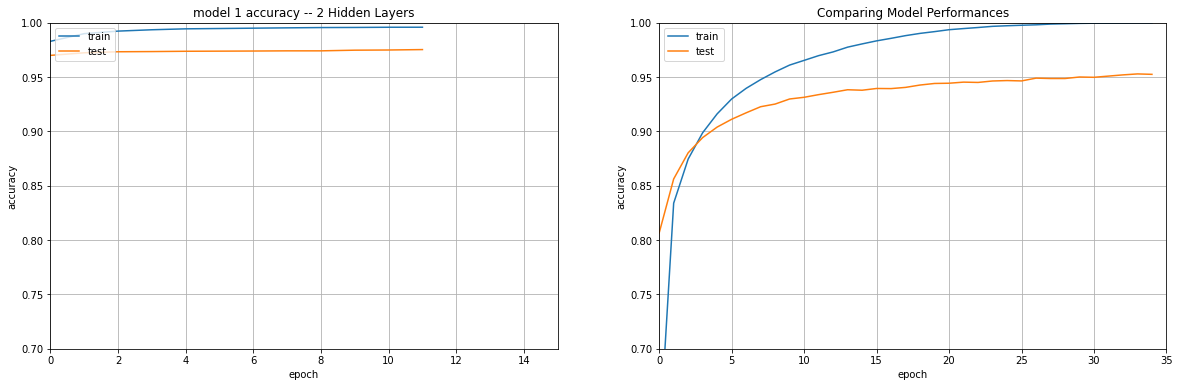

In [184]:
fig, axes = plt.subplots(1,2,figsize=(20,6))

ax1 , ax2 = axes

ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('model 1 accuracy -- 2 Hidden Layers')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.set_ylim(0.7,1.0)
ax1.set_xlim(0,15)
ax1.grid()
ax1.legend(['train', 'test'], loc='upper left')

ax2.plot(history_2.history['accuracy'])
ax2.plot(history_2.history['val_accuracy'])
ax2.set_title('model 2 accuracy -- 5 Hidden Layers')
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.set_ylim(0.7,1.0)
ax2.set_xlim(0,35)
ax2.grid()
ax2.legend(['train', 'test'], loc='upper left')

plt.title("Comparing Model Performances")

### Accuracy
-- Model 1 with 2 Hidden Layers sees a difference of 2% between train and validation set accuracy.  
-- On the Other hand, alternate model with 5 hidden layers observes a difference of 5% between train and validation set accuracy.

### Fitting the training set
-- Clearly model 2 overfits the dataset, this could be attributed to the large number of hidden layers of the model.  
-- This is because there ARE NOT enough features in the 28*28 images for such a large dataset.

### Number of Parameters
--- Model 1 and Model 2 have comparable number of parameters.
--- Even though Model 2 is bigger, the decreasing number of units in hidden layers exponentially decreases number of parameters (weights and biases).  

### Model Fit time 
--- Model 1 takes 50 sec for compilation and training.  
--- Model 2 takes over 140 sec for compilation and training.  
--- This is again, due to the huge size of the model, it takes time to converge to a minima.